# Logistic Regression for Two Variables

In [1]:
import collections
import math
import random
import time

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import scipy
import seaborn as sns
import sklearn
from sklearn import *
import statsmodels as sm

np.random.seed(1337)

%matplotlib inline

sns.set(font_scale=1.3)
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('muted'))

fsize=(20.0, 15.0)
linewidth = 1.0
dotsize = 15

/home/csizsek/jupyter/ve36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/csizsek/jupyter/ve36/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/home/csizsek/jupyter/ve36/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be rem

### Create the Classification Data Set

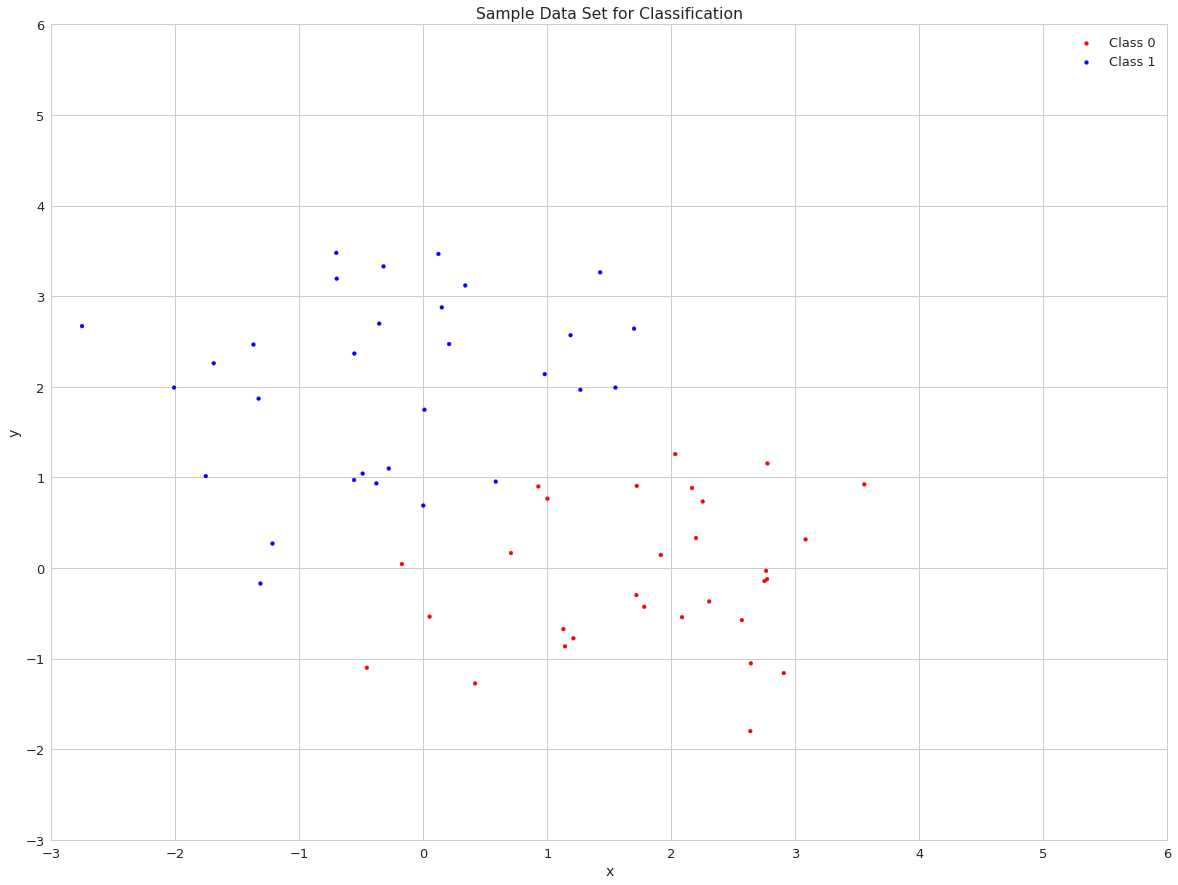

In [2]:
n_points = 30

d_pos = pd.DataFrame({
            'x': np.random.randn(n_points),
            'y': np.random.randn(n_points) + 2,
            't': [1] * n_points})

d_neg = pd.DataFrame({
            'x': np.random.randn(n_points) + 2,
            'y': np.random.randn(n_points),
            't': [0] * n_points})

d = pd.concat([d_pos, d_neg])

colors = {0: 'r', 1: 'b'}

_ = plt.figure(figsize=fsize)
_ = plt.scatter(d.x, d.y, c=d.t.map(colors), marker='o', s=dotsize, label=None)
_ = plt.scatter([], [], c='red', marker='o', s=dotsize, label='Class 0')
_ = plt.scatter([], [], c='blue', marker='o', s=dotsize, label='Class 1')
_ = plt.legend(loc='upper right')
_ = plt.xlim((-3, 6))
_ = plt.ylim((-3, 6))
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.title("Sample Data Set for Classification")

### Classification with Logistic Regression

In [3]:
x_min, x_max = -5, 10
y_min, y_max = -5, 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

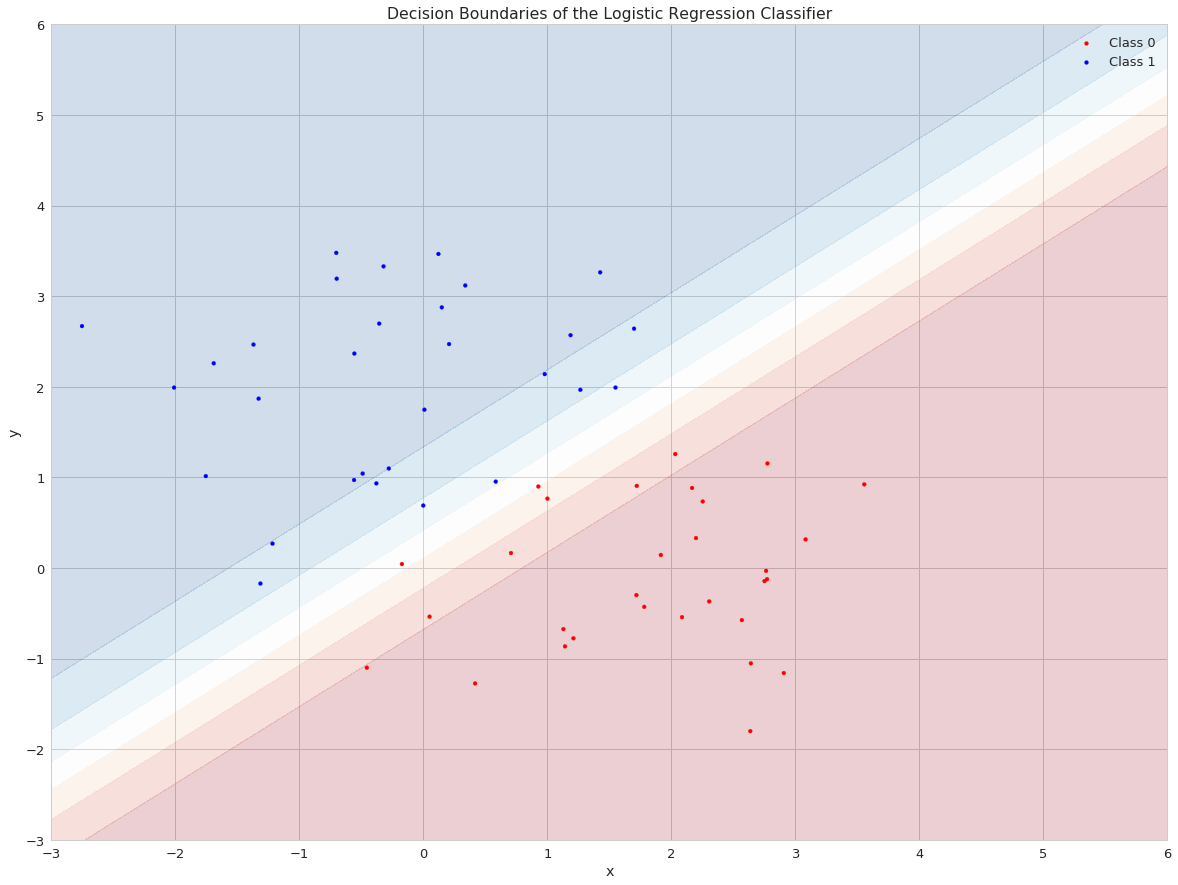

In [4]:
model = sklearn.linear_model.LogisticRegression()

model.fit(d[['x', 'y']], d.t)

_ = plt.figure(figsize=fsize)
ax = plt.subplot(1, 1, 1)

Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
_ = ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.2)

_ = plt.scatter(d.x, d.y, c=d.t.map(colors), marker='o', s=dotsize, label=None)
_ = plt.scatter([], [], c='red', marker='o', s=dotsize, label='Class 0')
_ = plt.scatter([], [], c='blue', marker='o', s=dotsize, label='Class 1')
_ = plt.legend(loc='upper right')
_ = plt.xlim((-3, 6))
_ = plt.ylim((-3, 6))
_ = plt.xlabel('x')
_ = plt.ylabel('y')
_ = plt.title('Decision Boundaries of the Logistic Regression Classifier')

In [5]:
def logistic_function(x):
    return 1 / (1 + np.exp(-x))

intercept:    -0.4119647752486667
coefficient:  -1.6606130401296753


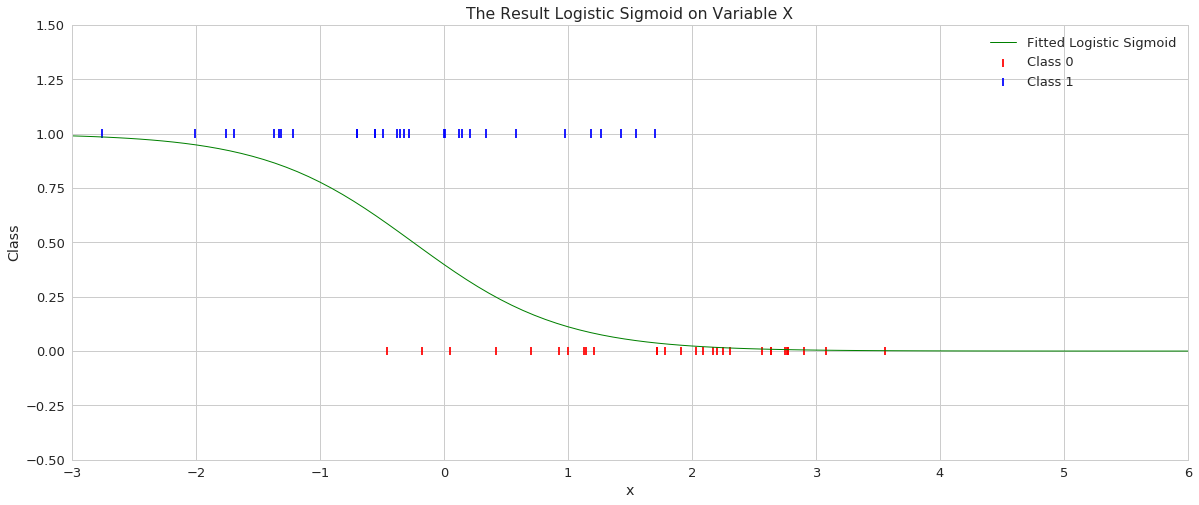

In [6]:
fitted_logistic = pd.DataFrame({'x': np.linspace(-3, 6, 100)})
fitted_logistic['y'] = [logistic_function(x * model.coef_[0][0] + model.intercept_[0]) for x in fitted_logistic.x]

print('intercept:   ', model.intercept_[0])
print('coefficient: ', model.coef_[0][0])

_ = plt.figure(figsize=(20, 8))
_ = plt.scatter(d.x, d.t, c=d.t.map(colors), marker='|', s=dotsize*5, label=None)
_ = plt.scatter([], [], c='red', marker='|', s=dotsize*5, label='Class 0')
_ = plt.scatter([], [], c='blue', marker='|', s=dotsize*5, label='Class 1')
_ = plt.plot(fitted_logistic.x, fitted_logistic.y, c='green', linewidth=linewidth, label='Fitted Logistic Sigmoid')
_ = plt.legend(loc='upper right')
_ = plt.xlim((-3, 6))
_ = plt.ylim((-0.5, 1.5))
_ = plt.xlabel('x')
_ = plt.ylabel('Class')
_ = plt.title("The Result Logistic Sigmoid on Variable X")

intercept:    -0.4119647752486667
coefficient:  1.9505263652584028


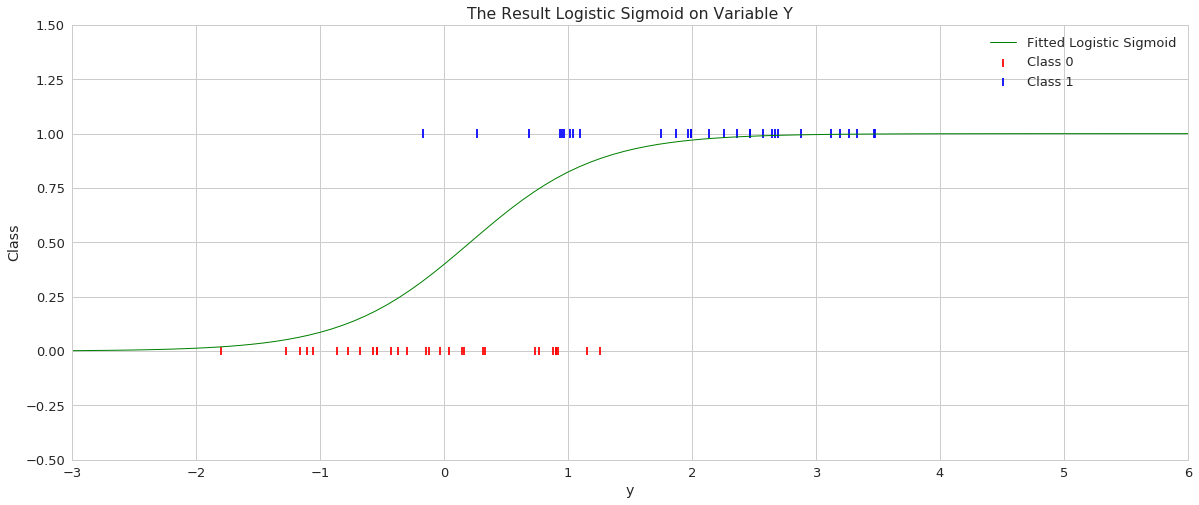

In [7]:
fitted_logistic = pd.DataFrame({'x': np.linspace(-3, 6, 100)})
fitted_logistic['y'] = [logistic_function(x * model.coef_[0][1] + model.intercept_[0]) for x in fitted_logistic.x]

print('intercept:   ', model.intercept_[0])
print('coefficient: ', model.coef_[0][1])

_ = plt.figure(figsize=(20, 8))
_ = plt.scatter(d.y, d.t, c=d.t.map(colors), marker='|', s=dotsize*5, label=None)
_ = plt.scatter([], [], c='red', marker='|', s=dotsize*5, label='Class 0')
_ = plt.scatter([], [], c='blue', marker='|', s=dotsize*5, label='Class 1')
_ = plt.plot(fitted_logistic.x, fitted_logistic.y, c='green', linewidth=linewidth, label='Fitted Logistic Sigmoid')
_ = plt.legend(loc='upper right')
_ = plt.xlim((-3, 6))
_ = plt.ylim((-0.5, 1.5))
_ = plt.xlabel('y')
_ = plt.ylabel('Class')
_ = plt.title("The Result Logistic Sigmoid on Variable Y")

### Try Different Classification Data Sets

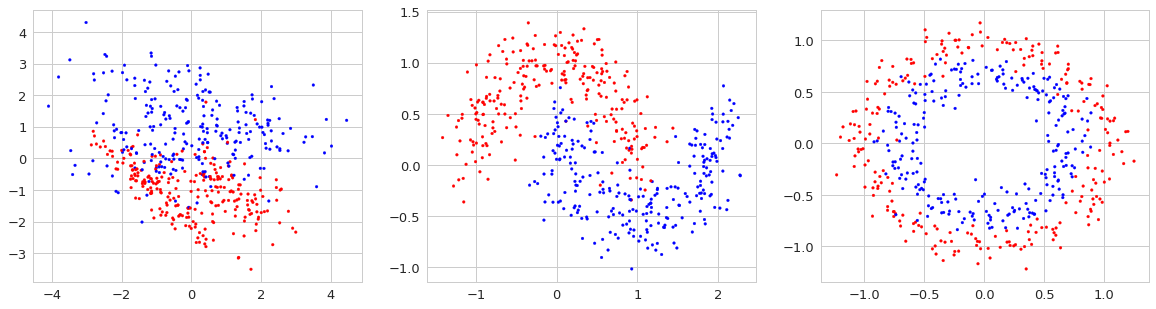

In [8]:
data_sets = []

d = sklearn.datasets.make_moons(n_samples=500, noise=0.2)
moons = pd.DataFrame(d[0])
moons.columns = ['x', 'y']
moons['t'] = d[1]

d, t = sklearn.datasets.make_classification(
        n_samples=500,
        n_features=2,
        n_redundant=0)
classif = pd.DataFrame(d)
classif.columns = ['x', 'y']
classif['t'] = t

d, t = sklearn.datasets.make_circles(
        n_samples=500,
        noise=0.1,
        factor=0.7)
circles = pd.DataFrame(d)
circles.columns = ['x', 'y']
circles['t'] = t

data_sets = [
     classif,
     moons,
     circles
]

_ = plt.figure(figsize=(20, 5))
for i in range(3):
    _ = plt.subplot(1, 3, i+1)
    _ = plt.scatter(
            data_sets[i].x,
            data_sets[i].y,
            c=data_sets[i].t.map(colors),
            marker='o',
            s=dotsize/2.0,
            label=None)

In [9]:
x_min, x_max = -5, 5
y_min, y_max = -5, 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

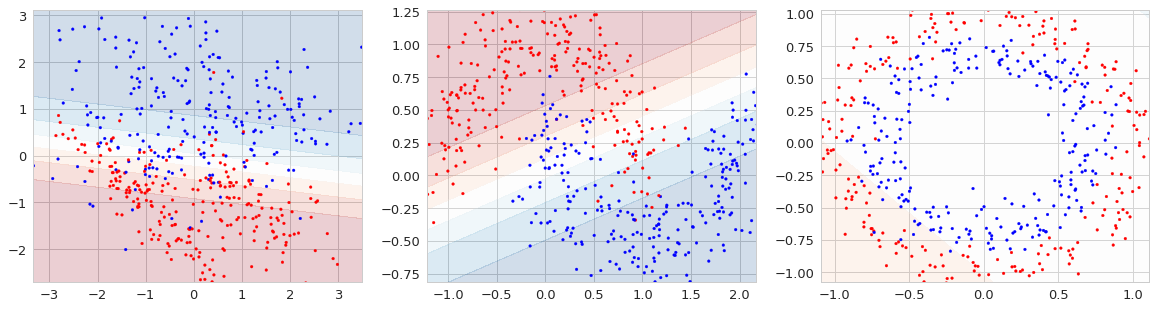

In [10]:
_ = plt.figure(figsize=(20, 5))
    
for j in range(len(data_sets)):

    model = sklearn.linear_model.LogisticRegression()

    model.fit(data_sets[j][['x', 'y']], data_sets[j].t)

    pred = model.predict(data_sets[j][['x', 'y']])

    score = sklearn.metrics.roc_auc_score(data_sets[j].t, pred)

    ax = plt.subplot(1, 3, j + 1)

    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    _ = ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.2)

    _ = plt.scatter(
            data_sets[j].x,
            data_sets[j].y,
            c=data_sets[j].t.map(colors),
            marker='o',
            s=dotsize/2.0,
            label=None)
    _ = plt.xlim((
            data_sets[j].x.quantile(0.01),
            data_sets[j].x.quantile(0.99)))
    _ = plt.ylim((
            data_sets[j].y.quantile(0.01),
            data_sets[j].y.quantile(0.99)))